# Dataset: GDP per Country 2020–2025

## ***

# Goal: Visualizing the the dataset in order to gain insight

## ***

# <span style="font-size:1.2em;">Table of Contents</span>

1. **Importing and Setting up**
   - 1.1. Imports
   - 1.2. Loading the Data
     
2. **Cleaning the Data**

3. **Visualization**
   - 3.1. The Spread of Data
   - 3.2. GDP Leaders in Each Year
   - 3.3. Lowest GDP in Each Year
   - 3.4. World GDP
   - 3.5. GDP Growth (2020-2025)
   - 3.6. Growth to GDP Ratio
   - 3.7. GDP Changes for Top 10 Countries

4. **Key Insights**

## 1. Importing and Setting up

### 1.1. Imports

In [1]:
#Importing libraries

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### 1.2. Loading the Data

In [2]:
#Loading data

GDP = pd.read_csv("./2020-2025.csv")
print(f"Number of countries in the data: {GDP.Country.nunique()}")
GDP_data = GDP.set_index("Country")
GDP_data.head()


Number of countries in the data: 196


,2020,2021,2022,2023,2024,2025
Country,,,,,,
Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [3]:
GDP_data.shape

(196, 6)

## 2. Cleaning the Data

In [4]:
#Checking for NA values

GDP_data.isnull().sum()

2020    0
2021    2
2022    2
2023    2
2024    4
2025    7
dtype: int64

In [5]:
#Imputing NA values

GDP_cols = GDP_data.columns
GDP_filled = GDP_data.apply(lambda row: row.fillna(row.mean()), axis = 1) 
GDP_filled.isnull().sum()
# GDP_filled[GDP_cols].head()
# GDP_data.loc[0].mean()

2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
dtype: int64

# 3. Visualization

### 3.1. The Spread of Data

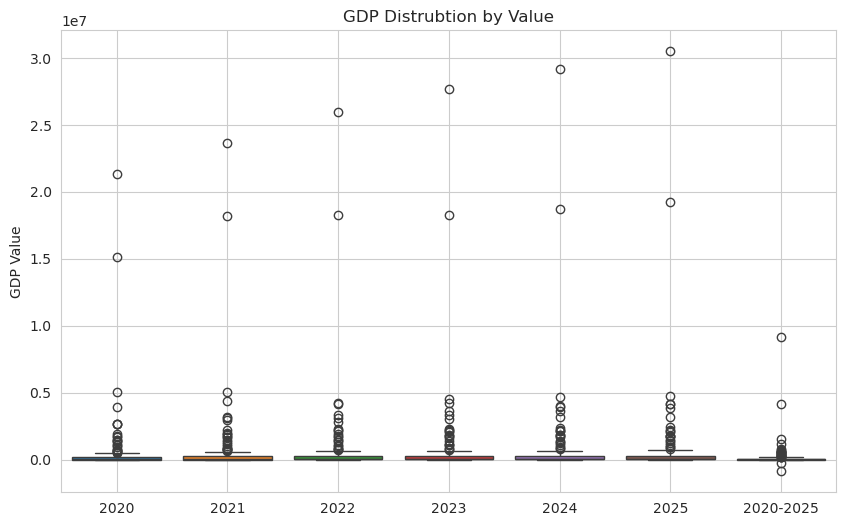

In [22]:
#Making a box plot to better visualize the spread of the data

plt.figure(figsize = (10,6))
sns.boxplot(data = GDP_filled)
plt.ylabel("GDP Value")
plt.grid(True)
plt.title("GDP Distrubtion by Value")
plt.show()

### 3.2. GDP Leaders in Each Year

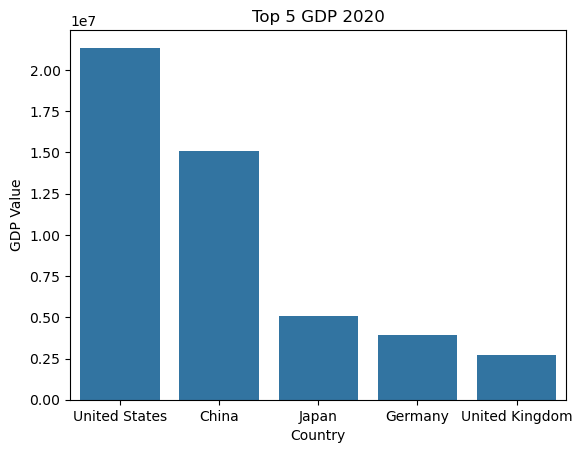

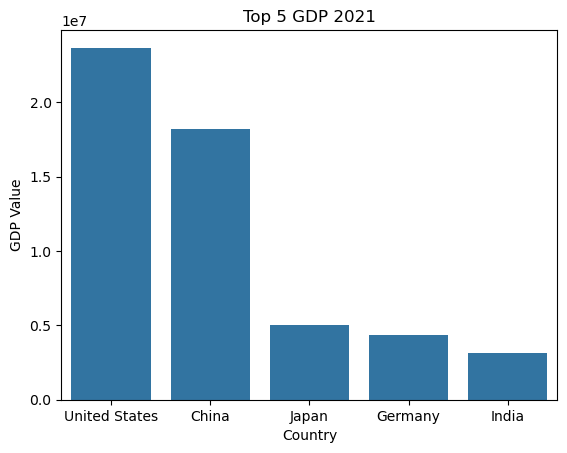

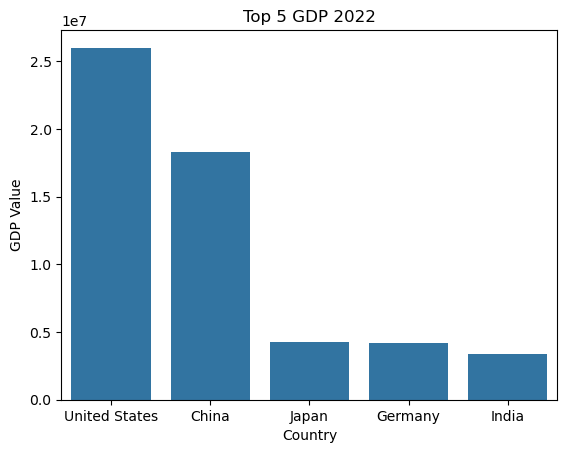

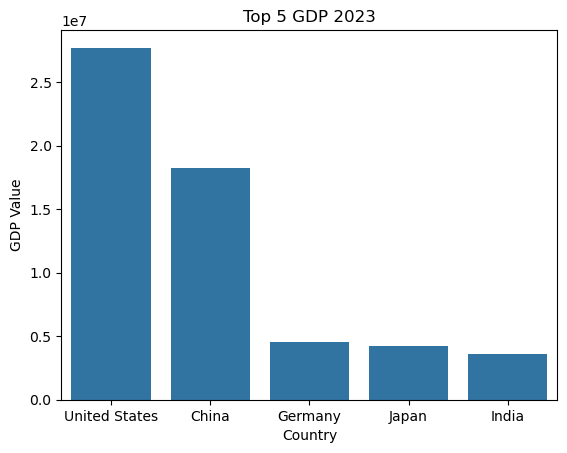

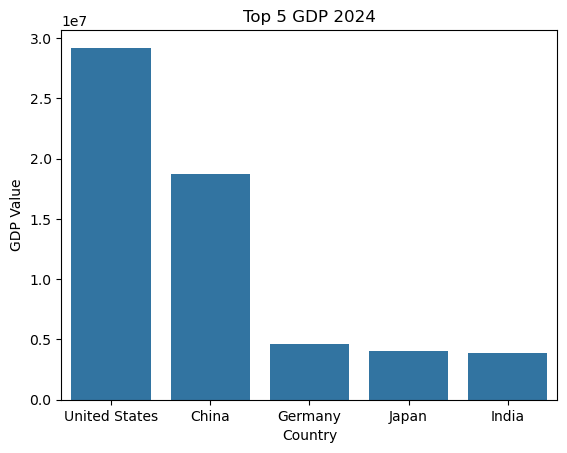

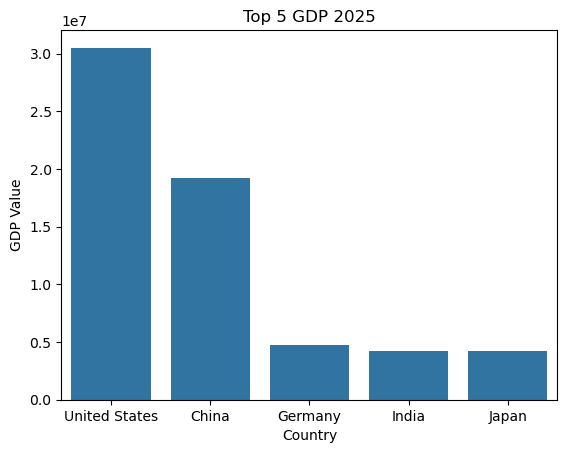

In [7]:
#Finding Top 5 GDP for each year and making a barplot

for year in range(2020,2026):
    top5 = GDP_filled[str(year)].sort_values(ascending = False).iloc[:5]
    plt.title(f"Top 5 GDP {year}")
    plt.ylabel("GDP Value")
    sns.barplot(x = top5.index, y = top5.values)
    plt.show()

### 3.3. Lowest GDP in Each Year

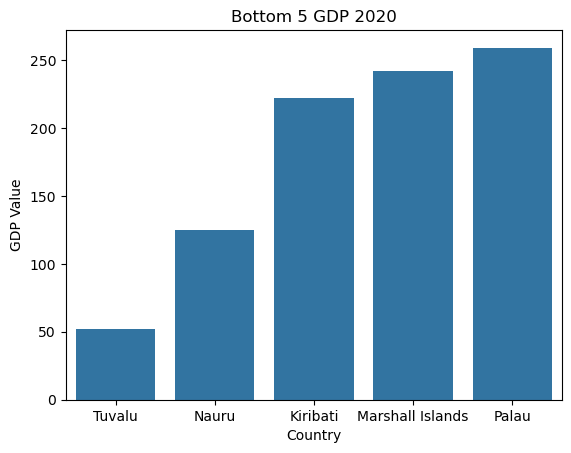

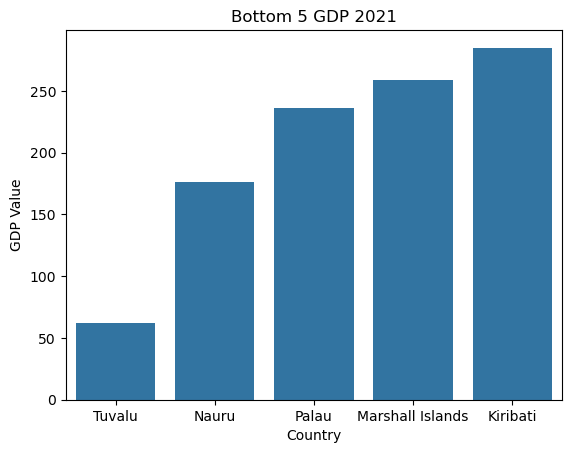

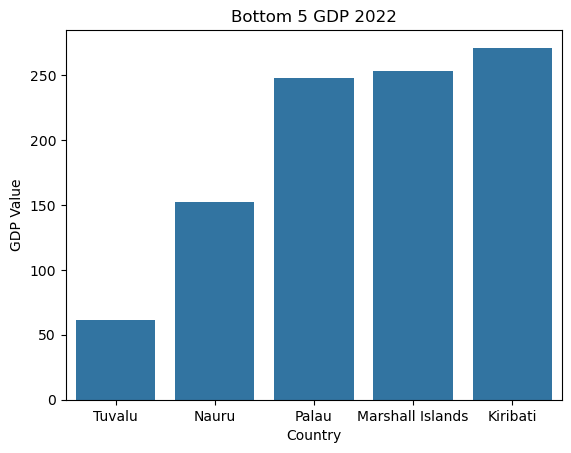

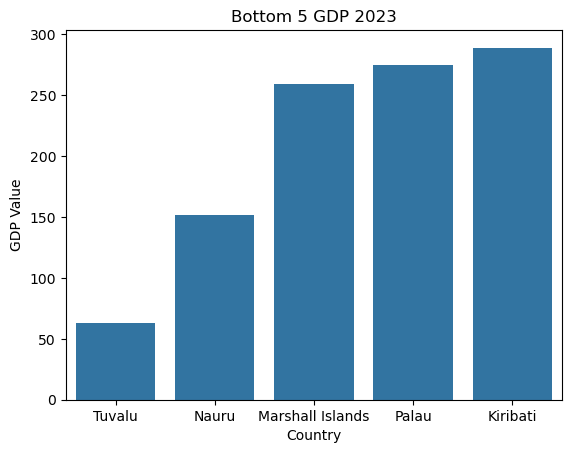

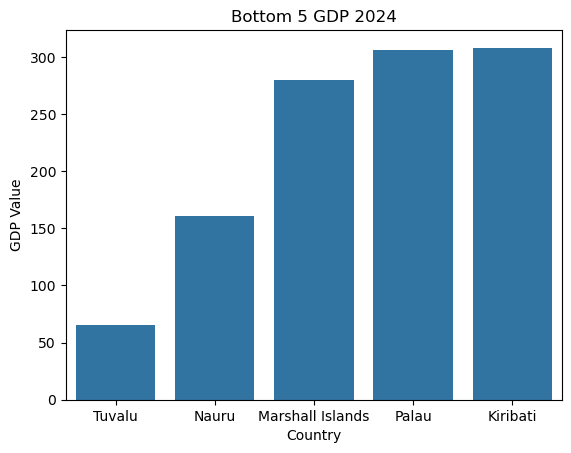

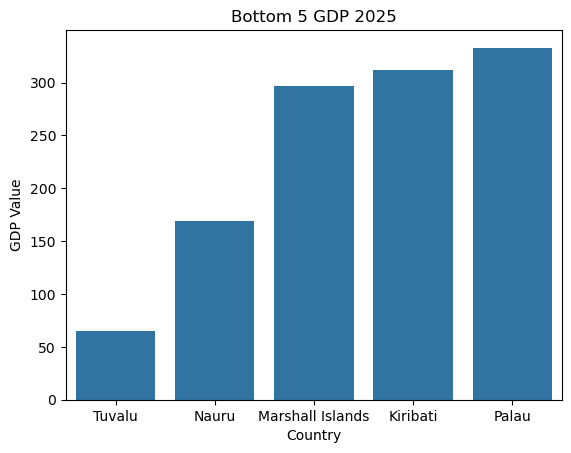

In [8]:
#Finding Bottom 5 GDP for each year and making a barplot

for year in range(2020,2026):
    low5 = GDP_filled[str(year)].sort_values().iloc[:5]
    plt.title(f"Bottom 5 GDP {year}")
    plt.ylabel("GDP Value")
    sns.barplot(x = low5.index, y = low5.values)
    plt.show()

### 3.4. World GDP

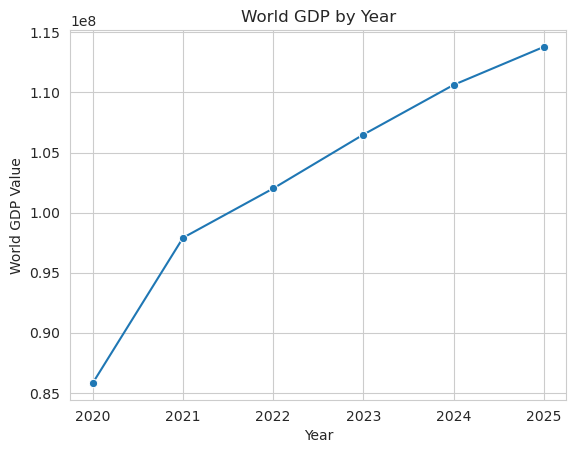

In [21]:
#Calculating total GDP in the world for each year and visualizing it
sum = [GDP_filled[x].sum() for x in GDP_cols]
sns.lineplot(x = GDP_cols, y = sum, marker = 'o')
plt.ylabel("World GDP Value")
plt.title("World GDP by Year")
plt.xlabel("Year")
plt.grid(True)
plt.show()

### 3.5. GDP Growth in the Span of 2020-2025

In [10]:
#Measuring the highest and lowest GDP growths between 2020 to 2025

GDP_filled["2020-2025"] = GDP_filled["2025"] - GDP_filled["2020"] 
GDP_filled.head()

,2020,2021,2022,2023,2024,2025,2020-2025
Country,,,,,,,
Afghanistan,20136.0,14278.0,14501.0,17248.0,16540.75,16540.75,-3595.25
Albania,15271.0,18086.0,19185.0,23388.0,27259.00,28372.00,13101.00
Algeria,164774.0,185850.0,225709.0,247789.0,264913.00,268885.00,104111.00
Andorra,2885.0,3325.0,3376.0,3786.0,4038.00,4035.00,1150.00
Angola,66521.0,84375.0,142442.0,109764.0,115946.00,113343.00,46822.00


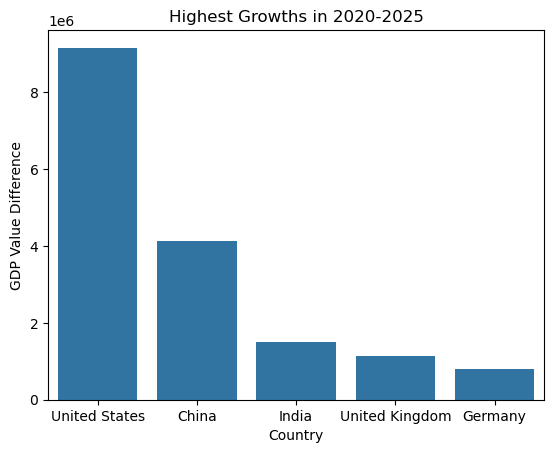

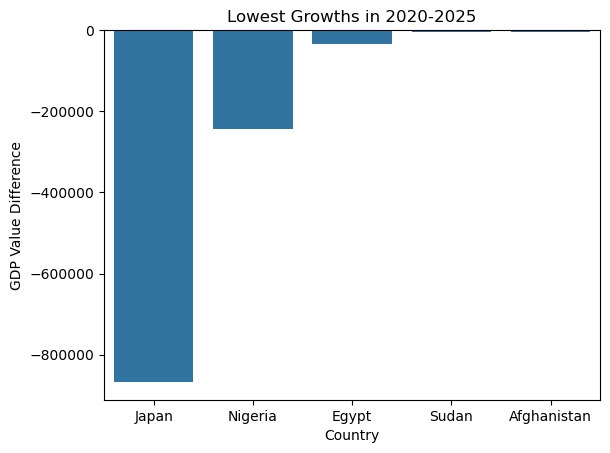

In [11]:
#Visualizing highest and lowest growths

high_growth5 = GDP_filled["2020-2025"].sort_values(ascending = False).iloc[:5]
plt.title("Highest Growths in 2020-2025")
plt.ylabel("GDP Value Difference")
sns.barplot(x = high_growth5.index, y = high_growth5.values)
plt.show()

low_growth5 = GDP_filled["2020-2025"].sort_values().iloc[:5]
plt.title("Lowest Growths in 2020-2025")
plt.ylabel("GDP Value Difference")
sns.barplot(x = low_growth5.index, y = low_growth5.values)
plt.show()

### 3.6. Growth to GDP Ratio

We calculate the GDP growth percentage since 2020, using the 2020 GDP as the baseline, to assess the change in their GDP. <br>
Since this value is only used in this section, it is stored in a copy of the main dataset.

In [12]:
#Making a copy of the main DF and calculating the ratio
ratio_data = GDP_filled.copy()
ratio_data["ratio"] = (ratio_data["2020-2025"] / ratio_data["2020"]) * 100
ratio_data.head()

,2020,2021,2022,2023,2024,2025,2020-2025,ratio
Country,,,,,,,,
Afghanistan,20136.0,14278.0,14501.0,17248.0,16540.75,16540.75,-3595.25,-17.854837
Albania,15271.0,18086.0,19185.0,23388.0,27259.00,28372.00,13101.00,85.790060
Algeria,164774.0,185850.0,225709.0,247789.0,264913.00,268885.00,104111.00,63.184119
Andorra,2885.0,3325.0,3376.0,3786.0,4038.00,4035.00,1150.00,39.861352
Angola,66521.0,84375.0,142442.0,109764.0,115946.00,113343.00,46822.00,70.386795


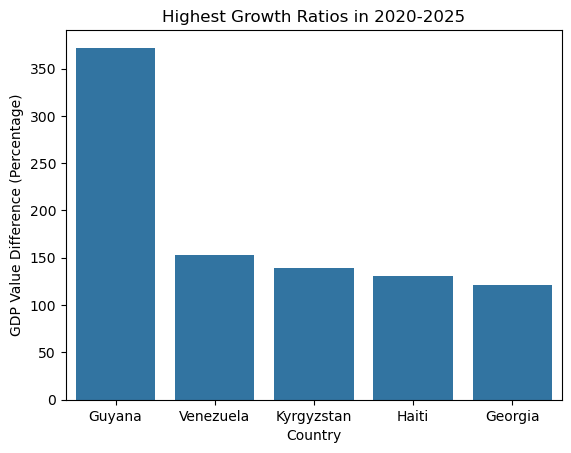

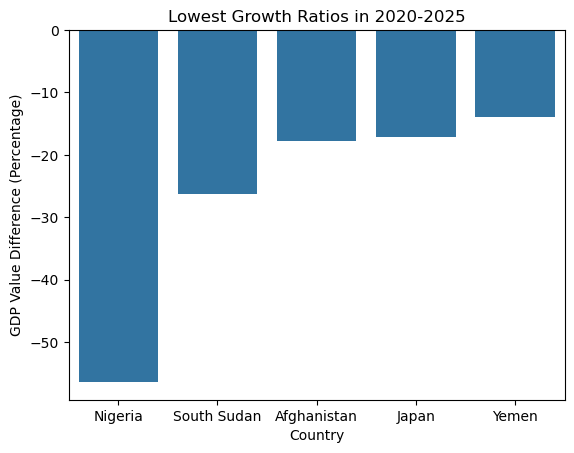

In [13]:
#Visualizing highest and lowest growths

high_growth5 = ratio_data["ratio"].sort_values(ascending = False).iloc[:5]
plt.title("Highest Growth Ratios in 2020-2025")
plt.ylabel("GDP Value Difference (Percentage)")
sns.barplot(x = high_growth5.index, y = high_growth5.values)
plt.show()

low_growth5 = ratio_data["ratio"].sort_values().iloc[:5]
plt.title("Lowest Growth Ratios in 2020-2025")
plt.ylabel("GDP Value Difference (Percentage)")
sns.barplot(x = low_growth5.index, y = low_growth5.values)
plt.show()

- Another fun trick that we can do is to compare growth ratios of top countries.

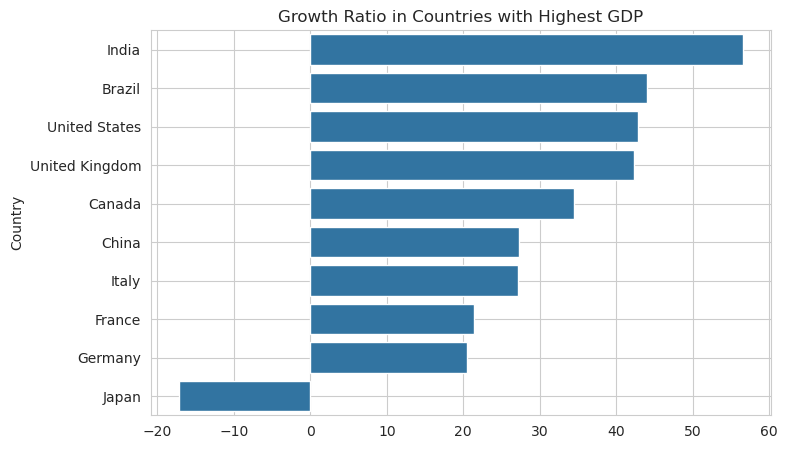

In [20]:
#Visualizing growth ratios of top countries

plt.figure(figsize= (8,5))
countries = GDP_filled["2025"].sort_values(ascending=False).index[:10]
series = ratio_data["ratio"].loc[countries].sort_values(ascending=False)
sns.barplot(x=series.values, y=series.index, orient="h")
plt.grid(True)
plt.title("Growth Ratio in Countries with Highest GDP")
plt.show()

### 3.7. GDP Changes for Top 10 Countries 

In [15]:
#Selecting Top countries in 2025 in order to visualize their growth over the years

top10 = GDP_filled.loc[countries].drop("2020-2025", axis = 1)
top10.head()    

,2020,2021,2022,2023,2024,2025
Country,,,,,,
United States,21354125.0,23681175.0,26006900.0,27720725.0,29184900.0,30507217.0
China,15103357.0,18190803.0,18307816.0,18270351.0,18748009.0,19231705.0
Germany,3936989.0,4351188.0,4166872.0,4527009.0,4658526.0,4744804.0
India,2674852.0,3167271.0,3346107.0,3638490.0,3909097.0,4187017.0
Japan,5054069.0,5039148.0,4262146.0,4213167.0,4026211.0,4186431.0


In [16]:
#Converting the DataFrame to a long format in order to visualize the top10 table

top10long = top10.reset_index()
top10long = top10long.melt(id_vars= "Country", value_name= "GDP", var_name="Year")
top10long.head()

,Country,Year,GDP
0,United States,2020,21354125.0
1,China,2020,15103357.0
2,Germany,2020,3936989.0
3,India,2020,2674852.0
4,Japan,2020,5054069.0


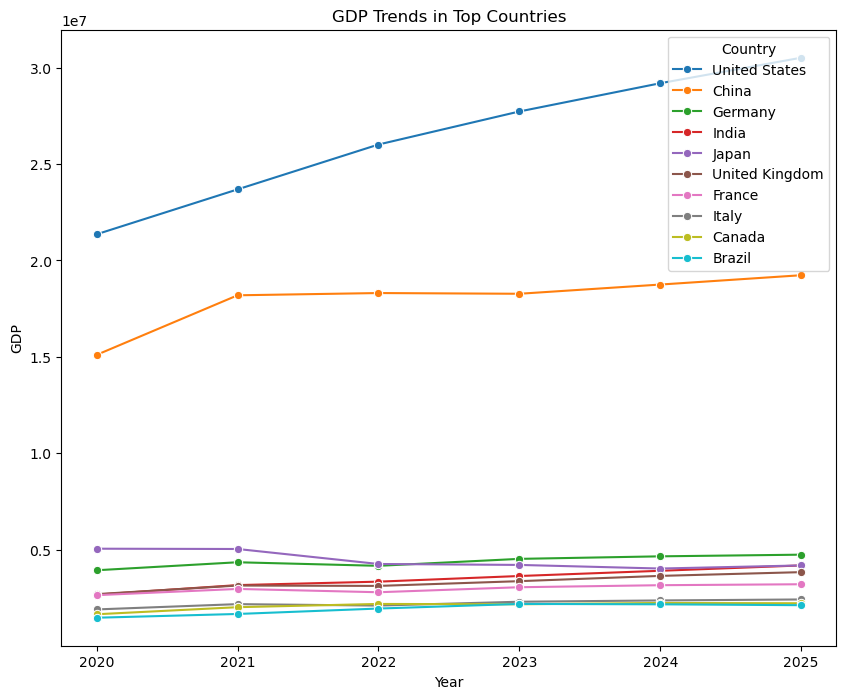

In [17]:
#Visualizing the growth of top 10 countries

plt.figure(figsize= (10,8))
sns.lineplot(x = "Year", y = "GDP", data = top10long, hue = "Country", marker= "o")
sns.set_style("whitegrid")
plt.title("GDP Trends in Top Countries")
plt.show()

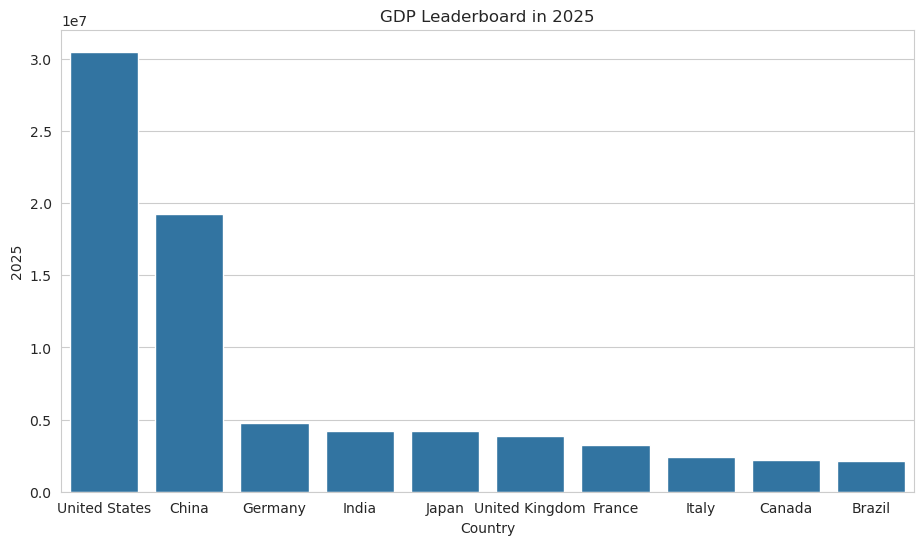

In [18]:
# Visualizing the state of GDP in 2025

plt.figure(figsize= (11,6))
sns.barplot(x = countries, y = top10["2025"])
plt.title("GDP Leaderboard in 2025")
plt.show()

## 4. Key Insights:
- The United States and China have been the leaders in GDP since 2020. While the U.S. maintains steady growth, China shows signs of stagnation.
stagnation.
- Although the top countries in total GDP are also leaders in growth (except Japan), some countries (as discussed in section 3.6) have managed to multiply their GDP over the span of five years.
- Japan has experienced the highest GDP losses, losing around 15% of its GDP. In contrast, India and Brazil are rising rapidly among the top countries.
- Among the countries experiencing GDP losses, Nigeria has lost more than 50% of its GDP.
- To predict future GDP values accurately, additional statistics are required, such as population, GDP per capita, inflation rate, and unemployment rate. Therefore, the provided data alone is insufficient to train a meaningful predictive model.